Need to have tensorflow, open-cv and tensorflow_datasets installed

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
ds = tfds.load('deep_weeds', batch_size = -1, as_supervised = True)

images, labels = ds['train']

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


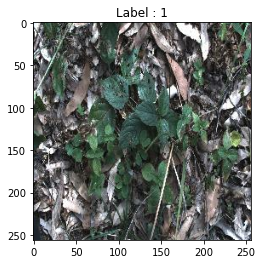

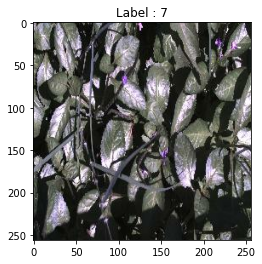

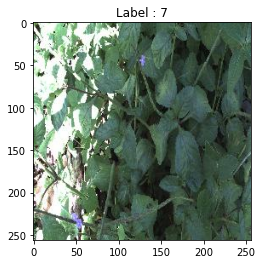

In [3]:
#Check some images
for i in range(3):
    fig , ax = plt.subplots()
    ax.imshow(images[i])
    ax.set_title("Label : " + str(labels[i].numpy()))

# Feature Engineering

Properties of Images which will be extracted and analysed

1. Average RBG values
2. Average Intensity (Convert to greyscale)
3. Compare Histogram
4. Comparing Edge Pictures
5. Apply filters like the gaussian and take average after
6. Comparing Gradient images

# Pre Processing

## Histogram equalization

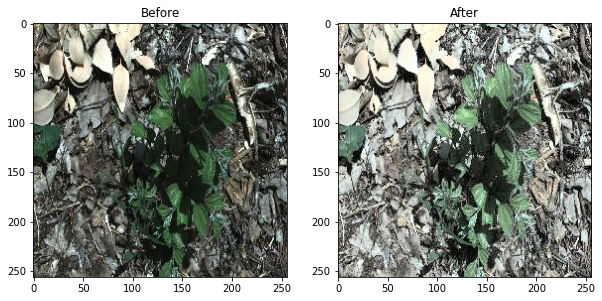

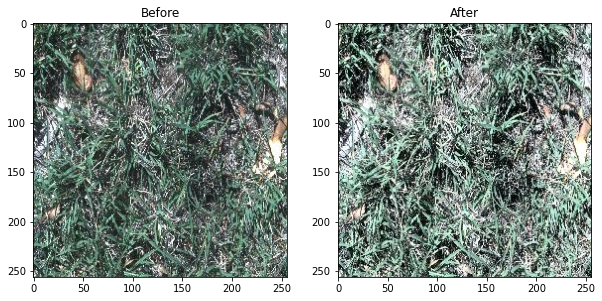

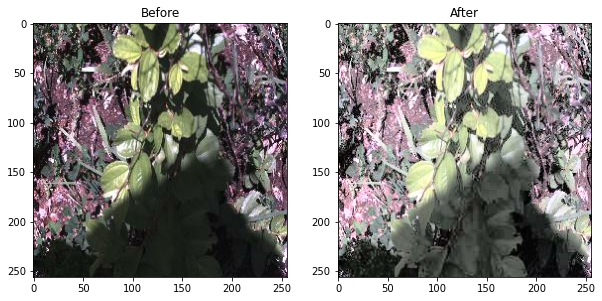

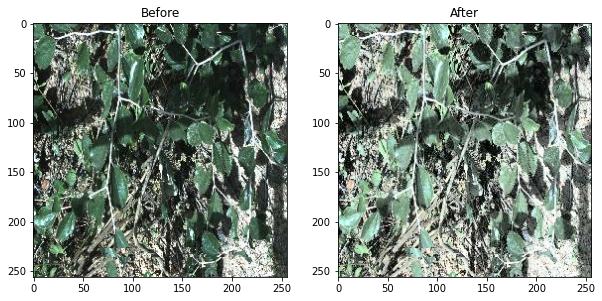

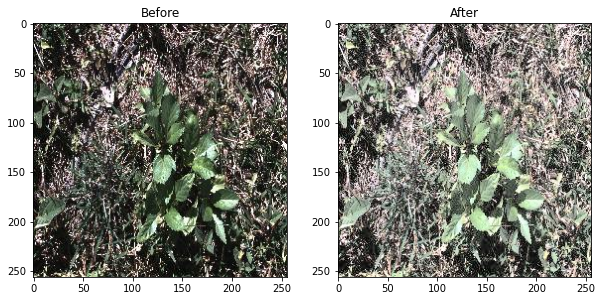

In [6]:
for i in range(5):
    i = np.random.randint(len(images))
    img = images[i].numpy()
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img)
    ax.set_title("Before")

    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

    ax = fig.add_subplot(1,2,2)
    plt.imshow(img_output)
    ax.set_title("After")

## Application of Different Blurs

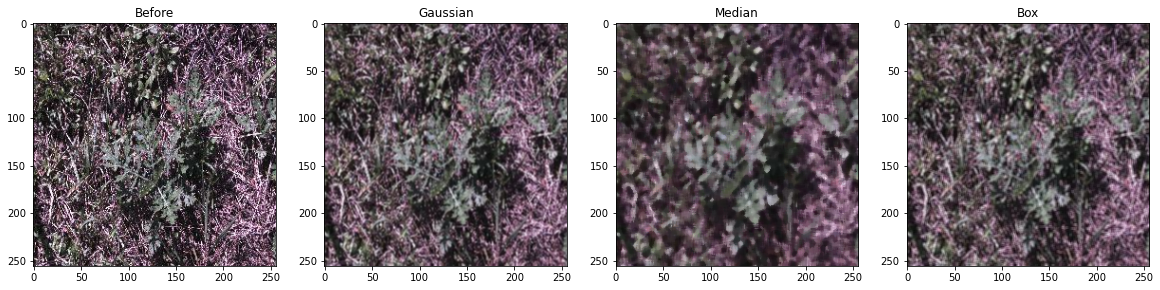

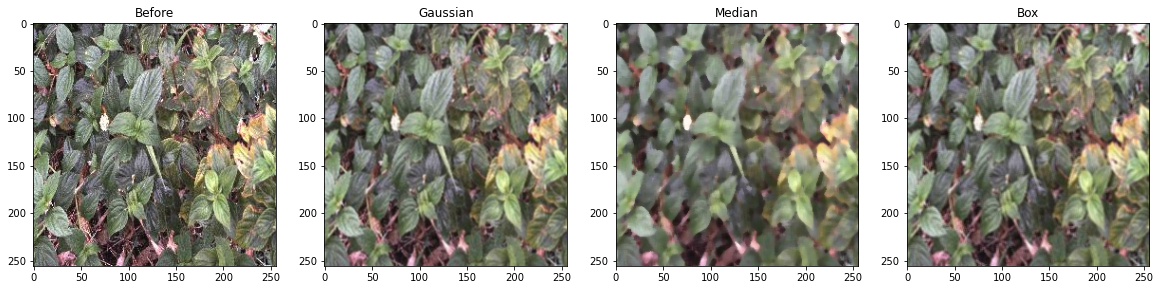

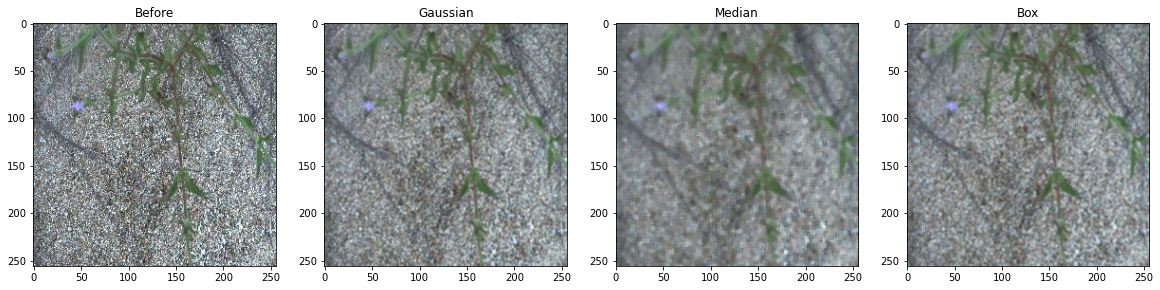

In [5]:
for i in range(3):
    i = np.random.randint(len(images))
    img = images[i].numpy()
    fig = plt.figure(figsize = (20,20))
    ax = fig.add_subplot(1,4,1)
    plt.imshow(img)
    ax.set_title("Before")
    
    gaussian = cv2.GaussianBlur(img, (3,3), 0)
    median = cv2.medianBlur(img,5)
    box = cv2.blur(img , (3,3))
    
    
    ax = fig.add_subplot(1,4,2)
    plt.imshow(gaussian)
    ax.set_title("Gaussian")
    
    ax = fig.add_subplot(1,4,3)
    plt.imshow(median)
    ax.set_title("Median")
    
    ax = fig.add_subplot(1,4,4)
    plt.imshow(box)
    ax.set_title("Box")


## Gradient Images

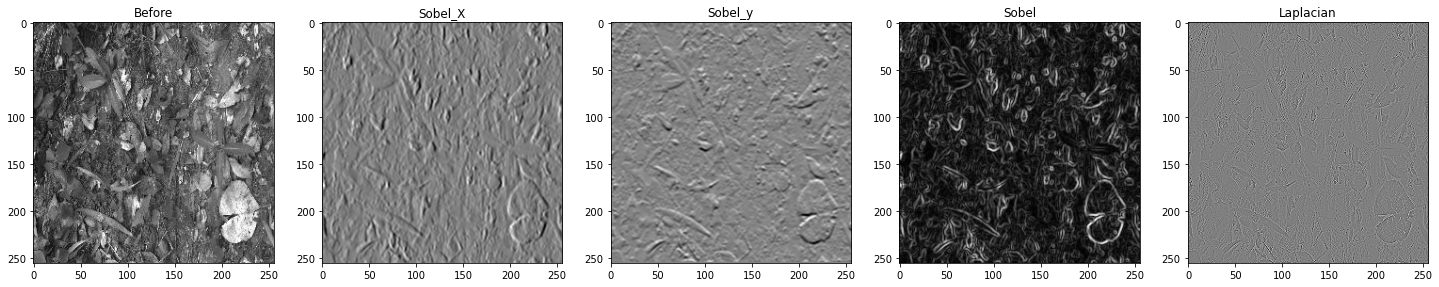

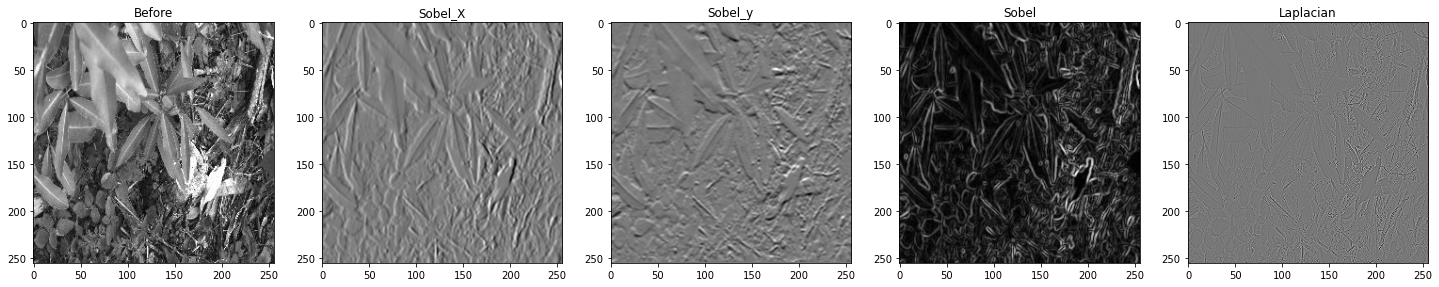

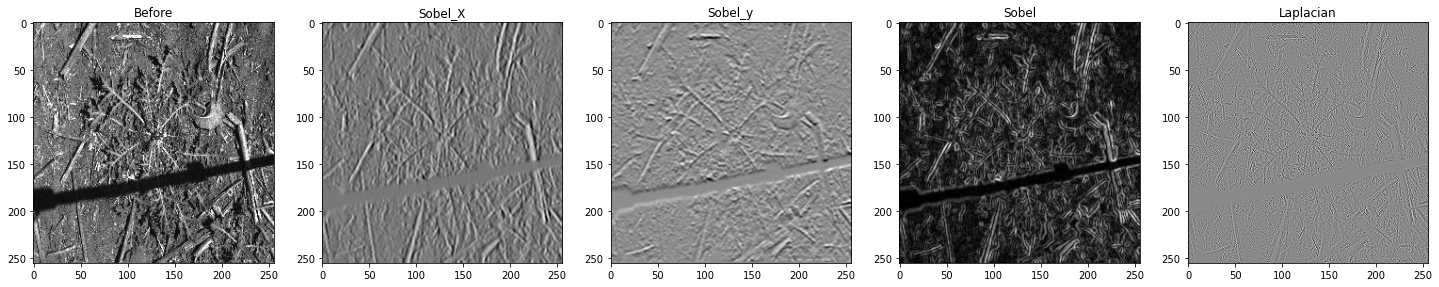

In [21]:
for i in range(3):
    i = np.random.randint(len(images))
    img = images[i].numpy()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    fig = plt.figure(figsize = (25,25))
    ax = fig.add_subplot(1,5,1)
    plt.imshow(img, cmap = 'gray')
    ax.set_title("Before")
    
    sobelx = cv2.Sobel(img, cv2.CV_64F,1,0, ksize = 5)
    sobely = cv2.Sobel(img, cv2.CV_64F,0,1, ksize = 5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    
    
    ax = fig.add_subplot(1,5,2)
    plt.imshow(sobelx, cmap = 'gray')
    ax.set_title("Sobel_X")
    
    ax = fig.add_subplot(1,5,3)
    plt.imshow(sobely, cmap = 'gray')
    ax.set_title("Sobel_y")
    
    ax = fig.add_subplot(1,5,4)
    plt.imshow(sobel, cmap = 'gray')
    ax.set_title("Sobel")
    
    ax = fig.add_subplot(1,5,5)
    plt.imshow(laplacian, cmap = 'gray')
    ax.set_title("Laplacian")